In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1st experiment

     measure     T
0          1  1.86
1          2  1.91
2          3  1.71
3          4  1.84
4          5  1.72
..       ...   ...
98        99  1.91
99       100  1.92
100      101  1.85
101      102  1.85
102      103  1.84

[103 rows x 2 columns]
1.51 1.98
0.047
v_bin : [1.5335, 1.5805, 1.6275, 1.6745, 1.7215, 1.7685, 1.8155000000000001, 1.8625, 1.9095, 1.9565000000000001]
1.86 0 0
1.91 0 1
1.71 0 2
1.84 0 3
1.72 0 4
1.91 0 5
1.71 0 6
1.91 0 7
1.85 0 8
1.78 0 9
1.85 0 10
1.7 0 11
1.64 0 12
1.84 0 13
1.78 0 14
1.98 0 15
1.91 0 16
1.92 0 17
1.85 0 18
1.65 0 19
1.92 0 20
1.72 0 21
1.83 0 22
1.85 0 23
1.77 0 24
1.77 0 25
1.84 0 26
1.72 0 27
1.85 0 28
1.78 0 29
1.78 0 30
1.71 0 31
1.92 0 32
1.78 0 33
1.79 0 34
1.83 0 35
1.91 0 36
1.72 0 37
1.83 0 38
1.85 0 39
1.85 0 40
1.78 0 41
1.71 0 42
1.77 0 43
1.77 0 44
1.77 0 45
1.78 0 46
1.71 0 47
1.72 0 48
1.91 0 49
1.65 0 50
1.72 0 51
1.51 0 52
1.71 0 53
1.77 0 54
1.71 0 55
1.77 0 56
1.71 0 57
1.71 0 58
1.72 0 59
1.71 0 60
1.9 0 61
1.78 0 62
1

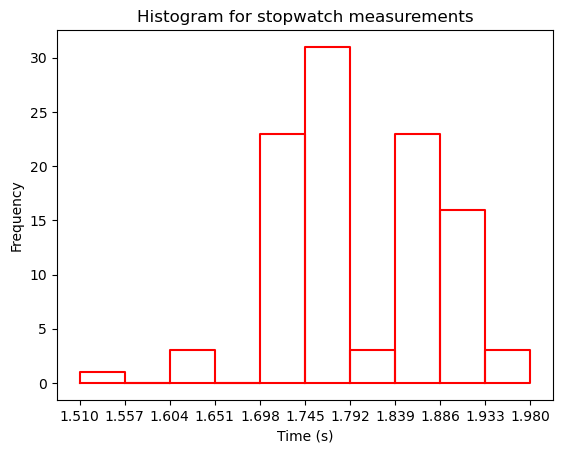

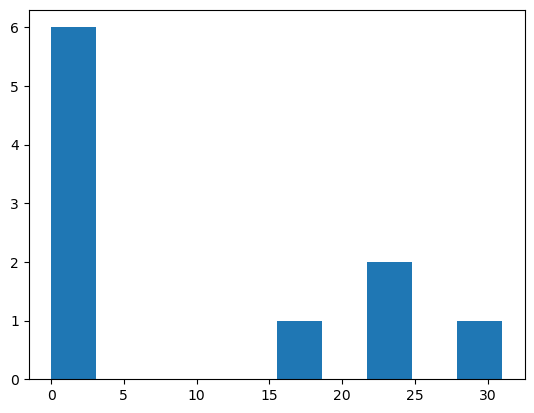

In [54]:
data_chrono = pd.read_csv("data/TD2/data_acquis_chrono.csv")
print(data_chrono)

# manually make histogram
N_BIN = 10
t_min = data_chrono['T'].min()
t_max = data_chrono['T'].max()
print(t_min, t_max)
interval_size = (t_max-t_min)/N_BIN
print(interval_size)
v_bin = [0 for i in range(N_BIN)]
# central position of each bin
for i in range(N_BIN):
    v_bin[i] = i*interval_size + interval_size/2 + t_min
print(f"v_bin : {v_bin}")
hist_v = [0 for i in range(N_BIN)]
for i in range(N_BIN):
    count = 0 # number of measurings that fit in bin i
    for j in range(len(data_chrono['T'])):
        print(data_chrono['T'][j], i, j)
        if (data_chrono['T'][j] >= (v_bin[i] - interval_size/2)) and (data_chrono['T'][j] < (v_bin[i] + interval_size/2)):
            count += 1
    hist_v[i] = count

print(hist_v)


# draw histogram
xticks = np.array(v_bin + [(v_bin[-1]+interval_size)])-interval_size/2
plt.xticks(xticks)
for i in range(N_BIN):
    freq_coords = [0, hist_v[i], hist_v[i], 0, 0]
    time_coords = [v_bin[i]-interval_size/2, v_bin[i]-interval_size/2, v_bin[i]+interval_size/2, v_bin[i]+interval_size/2, v_bin[i]-interval_size/2]
    plt.plot(time_coords, freq_coords, marker='',linestyle='-',color='red')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Histogram for stopwatch measurements")
plt.show()

#use plt.hist
bin_edges = [0 for i in range(2*N_BIN)]
for i in range(N_BIN):
    bin_edges[2*i] = v_bin[i] - interval_size/2
    bin_edges[2*i+1] = v_bin[i] + interval_size/2
plt.hist(hist_v, bins=N_BIN)
plt.show()


#print(hist_v)
